In [476]:
# ERP_visual
#!pip install cartopy
import cartopy.crs as ccrs # import projections
import cartopy.feature as cf # import features
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import seaborn as sns


In [ ]:
# Read longitude and latitude data
nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
lon = nc_albroof.variables['lon'][:]
lat = nc_albroof.variables['lat'][:]

# Find the index ranges corresponding to the longitude and latitude bounds
lon_mask = (lon >= -2.8) & (lon <= -1.8)
lat_mask = (lat >= 53.3) & (lat <= 53.75)

# Convert boolean masks to integer index arrays
lon_idx = np.where(lon_mask)[0]
lat_idx = np.where(lat_mask)[0]

# Assume albroof_subset is a 2D array and lon_idx / lat_idx are the index arrays
lon_Man = lon[lon_idx]
lat_Man = lat[lat_idx]

# pcolormesh expects 2D lon/lat grids; if lon_Man / lat_Man are 1D, expand them with meshgrid
lon_grid, lat_grid = np.meshgrid(lon_Man, lat_Man)

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point

# Load the Manchester shapefile
shapefile_path = "D:/A_sem2/ERP/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp"
gdf = gpd.read_file(shapefile_path)
print(gdf.columns)

# Filter administrative units for Greater Manchester, UK
g1 = gdf[(gdf['name'] == 'Manchester') & (gdf['iso_a2'] == 'GB')]
g2 = gdf[(gdf['name'] == 'Stockport') & (gdf['iso_a2'] == 'GB')]
g3 = gdf[(gdf['name'] == 'Wigan') & (gdf['iso_a2'] == 'GB')]
g4 = gdf[(gdf['name'] == 'Bolton') & (gdf['iso_a2'] == 'GB')]
g5 = gdf[(gdf['name'] == 'Salford') & (gdf['iso_a2'] == 'GB')]
g6 = gdf[(gdf['name'] == 'Trafford') & (gdf['iso_a2'] == 'GB')]
g7 = gdf[(gdf['name'] == 'Tameside') & (gdf['iso_a2'] == 'GB')]
g8 = gdf[(gdf['name'] == 'Oldham') & (gdf['iso_a2'] == 'GB')]
g9 = gdf[(gdf['name'] == 'Rochdale') & (gdf['iso_a2'] == 'GB')]
g10 = gdf[(gdf['name'] == 'Bury') & (gdf['iso_a2'] == 'GB')]

# Concatenate GeoDataFrames (axis=0 concatenates rows)
gdf_combined = gpd.GeoDataFrame(pd.concat([g1, g2, g3, g4, g5, g6, g7, g8, g9, g10], axis=0), crs=gdf.crs)

# Merge geometries into a single (Multi)Polygon
manchester_polygon = gdf_combined.unary_union

def mask_data_inside_polygon(lon_grid, lat_grid, data_array, polygon):
    """
    Filter 2D gridded data to keep only points inside a polygon;
    set values outside the polygon to np.nan.

    Parameters:
    - lon_grid: 2D numpy array of longitudes
    - lat_grid: 2D numpy array of latitudes
    - data_array: 2D numpy array of data matching the grids
    - polygon: shapely Polygon or MultiPolygon representing the mask

    Returns:
    - filtered_data: 2D numpy array with values inside polygon kept and
      values outside set to np.nan
    """
    # Flatten the lon/lat grids and create shapely Points
    points = [Point(x, y) for x, y in zip(lon_grid.flatten(), lat_grid.flatten())]
    # Determine which points are inside the polygon
    mask = np.array([polygon.contains(pt) for pt in points])

    # Create an array full of NaNs
    filtered_data = np.full(data_array.size, np.nan)

    # Keep data only for points inside the polygon
    filtered_data[mask] = data_array.flatten()[mask]

    # Reshape back to the original 2D shape
    filtered_data = filtered_data.reshape(data_array.shape)

    return filtered_data

# Example usage (commented out):
# filtered_data = mask_data_inside_polygon(lon_grid, lat_grid, htroof_Man, manchester_polygon)
# plt.figure(figsize=(8,6))
# plt.pcolormesh(lon_grid, lat_grid, filtered_data, shading='auto', cmap='viridis')
# plt.colorbar()
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('wtroadperv_Man')
# gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
# plt.show()

1
2
3
4
5
6
7
8
9
10
11
12


In [480]:
albroof_Man = mask_data_inside_polygon(lon_grid, lat_grid, albroof_Man, manchester_polygon)
emroof_Man = mask_data_inside_polygon(lon_grid, lat_grid,  emroof_Man, manchester_polygon)
albimproad_Man = mask_data_inside_polygon(lon_grid, lat_grid, albimproad_Man, manchester_polygon)
emimproad_Man = mask_data_inside_polygon(lon_grid, lat_grid, emimproad_Man, manchester_polygon)
albperroad_Man = mask_data_inside_polygon(lon_grid, lat_grid, albperroad_Man, manchester_polygon)
emperroad_Man = mask_data_inside_polygon(lon_grid, lat_grid, emperroad_Man, manchester_polygon)
emwall_Man = mask_data_inside_polygon(lon_grid, lat_grid, emwall_Man, manchester_polygon)
htroof_Man = mask_data_inside_polygon(lon_grid, lat_grid, htroof_Man, manchester_polygon)
canyonhwr_Man = mask_data_inside_polygon(lon_grid, lat_grid, canyonhwr_Man, manchester_polygon)
wtlunitroof_Man = mask_data_inside_polygon(lon_grid, lat_grid, wtlunitroof_Man, manchester_polygon)
wtroadperv_Man = mask_data_inside_polygon(lon_grid, lat_grid, wtroadperv_Man, manchester_polygon)


# # 绘图，只显示多边形内数据，外面自动空白
# plt.figure(figsize=(8,6))
# plt.pcolormesh(lon_grid, lat_grid, filtered_data, shading='auto', cmap='viridis')
# plt.colorbar()
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('wtroadperv_Man')

# # 叠加绘制边界线
# gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
# # plt.savefig('wtroadperv_Man', dpi=300, bbox_inches='tight')
# plt.show()


In [ ]:
# Store the loaded 2D variables into the `features` array sequentially

import numpy as np

# Assume the individual 2D arrays (for the Manchester subset) already exist:
# albroof_Man, emroof_Man, albimproad_Man, emimproad_Man,
# albperroad_Man, emperroad_Man, albwall_Man, emwall_Man,
# htroof_Man, canyonhwr_Man, wtlunitroof_Man, wtroadperv_Man

# --- 1. Determine the shape of each 2D array ---
height, width = albroof_Man.shape

# --- 2. Number of features (replace if different) ---
num_features = 12

# --- 3. Create a 3D container: (feature, height, width) ---
features = np.empty((num_features, height, width), dtype=albroof_Man.dtype)

# --- 4. Populate the 3D array with each 2D variable ---
features[0, :, :] = albroof_Man
features[1, :, :] = emroof_Man
features[2, :, :] = albimproad_Man
features[3, :, :] = emimproad_Man
features[4, :, :] = albperroad_Man
features[5, :, :] = emperroad_Man
features[6, :, :] = albwall_Man
features[7, :, :] = emwall_Man
features[8, :, :] = htroof_Man
features[9, :, :] = canyonhwr_Man
features[10, :, :] = wtlunitroof_Man
features[11, :, :] = wtroadperv_Man

# --- 5. Inspect shapes and sample values ---
print(features.shape)           # expected: (12, height, width)
print(emroof_Man[0, 0])         # display a single value from one variable
print(features[:, 0, 0])        # display all feature values at the first grid cell

# Example: take feature index 4 (ALB PERROAD), flatten and inspect shape
ff = features[4, :, :]          # 2D array for feature 4
ff_flat = ff.reshape(-1)        # flatten to 1D
print(ff_flat.shape)            # expected: (height*width,)

(12, 50, 112)


nan

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

(5600,)


### Use klaML for prediction

In [ ]:
# ============= Load models and predict =============
import pickle
import numpy as np

automl1 = pickle.load(open('ERP_automl_model_TSAmax.pkl', 'rb'))
automl2 = pickle.load(open('ERP_automl_model_TSAmean.pkl', 'rb'))
automl3 = pickle.load(open('ERP_automl_model_RH2Mmax.pkl', 'rb'))
automl4 = pickle.load(open('ERP_automl_model_RH2Mmean.pkl', 'rb'))
automl5 = pickle.load(open('ERP_automl_model_HIAmax.pkl', 'rb'))
automl6 = pickle.load(open('ERP_automl_model_HIAmean.pkl', 'rb'))

num_features, height, width = features.shape

# Reshape features so each grid cell is a sample
X_klaml = features.reshape(num_features, -1).T
print(X_klaml.shape)

# Initial predictions
y_pred_klaml_1 = automl1.predict(X_klaml)
y_pred_klaml_2 = automl2.predict(X_klaml)
y_pred_klaml_3 = automl3.predict(X_klaml)
y_pred_klaml_4 = automl4.predict(X_klaml)
y_pred_klaml_5 = automl5.predict(X_klaml)

# Cap unrealistic HIAmax values (>45) by replacing them with random values in [35,45)
mask = y_pred_klaml_5 > 45
if mask.any():
    y_pred_klaml_5[mask] = np.random.uniform(35, 45, size=mask.sum())

y_pred_klaml_6 = automl6.predict(X_klaml)

# Reshape predictions back to grid (H, W)
y_pred_grid_klaml_1 = y_pred_klaml_1.reshape(height, width)
y_pred_grid_klaml_2 = y_pred_klaml_2.reshape(height, width)
y_pred_grid_klaml_3 = y_pred_klaml_3.reshape(height, width)
y_pred_grid_klaml_4 = y_pred_klaml_4.reshape(height, width)
y_pred_grid_klaml_5 = y_pred_klaml_5.reshape(height, width)
y_pred_grid_klaml_6 = y_pred_klaml_6.reshape(height, width)

# Example of inspecting one feature
kff = X_klaml[:, 4]
print(kff.shape)

# Create a mask for grid cells where all features are NaN (H, W)
nan_mask = np.isnan(features).all(axis=0)

# (Redundant) Predict again to ensure variables are up to date
y_pred_klaml_1 = automl1.predict(X_klaml)
y_pred_grid_klaml_1 = y_pred_klaml_1.reshape(height, width)

y_pred_klaml_2 = automl2.predict(X_klaml)
y_pred_grid_klaml_2 = y_pred_klaml_2.reshape(height, width)

y_pred_klaml_3 = automl3.predict(X_klaml)
y_pred_grid_klaml_3 = y_pred_klaml_3.reshape(height, width)

y_pred_klaml_4 = automl4.predict(X_klaml)
y_pred_grid_klaml_4 = y_pred_klaml_4.reshape(height, width)

y_pred_klaml_5 = automl5.predict(X_klaml)
y_pred_grid_klaml_5 = y_pred_klaml_5.reshape(height, width)

y_pred_klaml_6 = automl6.predict(X_klaml)
y_pred_grid_klaml_6 = y_pred_klaml_6.reshape(height, width)

# Apply the NaN mask to all prediction grids
y_pred_grid_klaml_1[nan_mask] = np.nan
y_pred_grid_klaml_2[nan_mask] = np.nan
y_pred_grid_klaml_3[nan_mask] = np.nan
y_pred_grid_klaml_4[nan_mask] = np.nan
y_pred_grid_klaml_5[nan_mask] = np.nan
y_pred_grid_klaml_6[nan_mask] = np.nan

# Filter predictions to the Manchester polygon (example uses provided mask function)
y_pred_grid_klaml_filtered_2 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_2 - 273.15, manchester_polygon)
y_pred_grid_klaml_filtered_3 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_3, manchester_polygon)
y_pred_grid_klaml_filtered_4 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_4, manchester_polygon)
y_pred_grid_klaml_filtered_5 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_5, manchester_polygon)
y_pred_grid_klaml_filtered_6 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_6, manchester_polygon)

# Note: if you need the TSAmax grid filtered into Celsius, do:
# y_pred_grid_klaml_filtered_1 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_1 - 273.15, manchester_polygon)

# (Optional) Compute 95th percentile for TSA max (example)
# percentile_95 = np.nanpercentile(y_pred_grid_klaml_filtered_1, 95)
# print(f"95th percentile: {percentile_95:.2f}°C")

# (Optional) Quick plot example (uncomment to use)
# plt.pcolormesh(lon_grid, lat_grid, y_pred_grid_klaml_filtered_1, shading='auto', cmap='viridis')
# plt.colorbar(label='TSAmax (°C)')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('TSAmax in Selected Region')
# gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
# plt.show()

(5600, 12)
(5600,)


In [ ]:
target_y = y_pred_grid_klaml_filtered_4
print(target_y.shape)

# Compute the 95th percentile threshold
threshold = 59.99  # np.nanpercentile(target_y, 95)
print(f"{threshold:.2f}°C")

# Create an extreme-value mask
extreme_mask = target_y > threshold
extreme_count = np.sum(extreme_mask)
total_count = np.sum(~np.isnan(target_y))
print(f"extreme_count: {extreme_count}/{total_count} ({extreme_count/total_count*100:.1f}%)")

(50, 112)
59.99°C
extreme_count: 104/2073 (5.0%)


canyonhwr_Man 的 10 百分位数是: 0.22


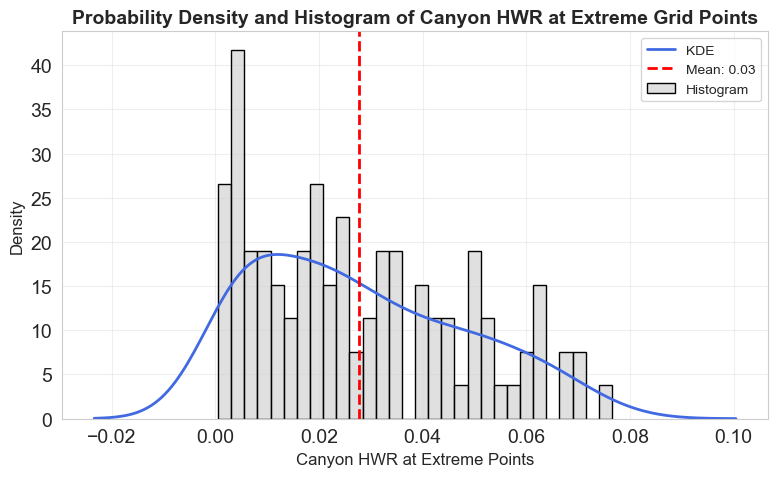

In [ ]:
# Assume `canyonhwr_Man` and `extreme_mask` are already defined
# canyonhwr_Man = ...  # your canyonhwr_Man data
# extreme_mask = ...   # your extreme_mask

percentile_10_canyonhwr_Man = np.nanpercentile(canyonhwr_Man, 10)

print(f"10th percentile of canyonhwr_Man: {percentile_10_canyonhwr_Man:.2f}")
# Extract canyonhwr_Man values at extreme points
canyonhwr_extremes = canyonhwr_Man[extreme_mask]

# Compute mean
mean_canyonhwr = np.mean(canyonhwr_extremes)

# Create figure
plt.figure(figsize=(8, 5))  # adjust figure size as needed

# Plot histogram
# stat='density' ensures the histogram y-axis is a density, consistent with KDE
sns.histplot(canyonhwr_extremes, bins=30, stat='density', color='lightgray', edgecolor='black', alpha=0.7, label='Histogram')

# Plot kernel density estimate
sns.kdeplot(canyonhwr_extremes, color='royalblue', linewidth=2, label='KDE')

# Add mean vertical line
plt.axvline(mean_canyonhwr, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_canyonhwr:.2f}')

# Set labels and title
plt.xlabel('Canyon HWR at Extreme Points', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Probability Density and Histogram of Canyon HWR at Extreme Grid Points', fontsize=14)
plt.legend(fontsize=10)  # show legend
plt.grid(True, alpha=0.3)  # add grid lines
plt.tight_layout()  # adjust layout to avoid label overlap
plt.show()

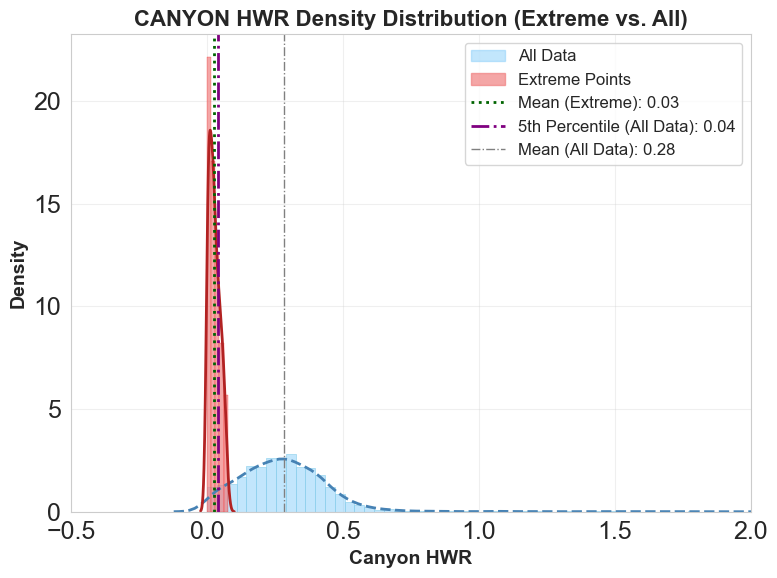

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Extract extreme points and compute statistics
canyonhwr_extremes = canyonhwr_Man[extreme_mask]
mean_canyonhwr_extremes = np.nanmean(canyonhwr_extremes)
mean_canyonhwr_all = np.nanmean(canyonhwr_Man)
percentile_all_canyonhwr = np.nanpercentile(canyonhwr_Man, 5)

fig, ax = plt.subplots(figsize=(8, 6))

# Histogram for all data
sns.histplot(canyonhwr_Man.flatten(), bins=100, kde=False, stat='density',
             color='lightskyblue', edgecolor='skyblue', alpha=0.5, ax=ax, label='_nolegend_')

# Histogram for extreme points
sns.histplot(canyonhwr_extremes.flatten(), bins=5, kde=False, stat='density',
             color='lightcoral', edgecolor='red', alpha=0.7, ax=ax, label='_nolegend_')

# KDE plots (no automatic legend)
sns.kdeplot(canyonhwr_Man.flatten(), color='steelblue', linewidth=2, linestyle='--', ax=ax, legend=False)
sns.kdeplot(canyonhwr_extremes.flatten(), color='firebrick', linewidth=2, ax=ax, legend=False)

# Indicator lines
v1 = ax.axvline(mean_canyonhwr_extremes, color='darkgreen', linestyle=':', linewidth=2,
                label=f'Mean (Extreme): {mean_canyonhwr_extremes:.2f}')
v2 = ax.axvline(percentile_all_canyonhwr, color='purple', linestyle='-.', linewidth=2,
                label=f'5th Percentile (All Data): {percentile_all_canyonhwr:.2f}')
v3 = ax.axvline(mean_canyonhwr_all, color='gray', linestyle='-.', linewidth=1,
                label=f'Mean (All Data): {mean_canyonhwr_all:.2f}')

# Manually construct legend handles
hist_all_patch = mpatches.Patch(color='lightskyblue', alpha=0.5, label='All Data')
hist_extreme_patch = mpatches.Patch(color='lightcoral', alpha=0.7, label='Extreme Points')
mean_line = plt.Line2D([0], [0], color='darkgreen', linestyle=':', linewidth=2,
                      label=f'Mean (Extreme): {mean_canyonhwr_extremes:.2f}')
p5_line  = plt.Line2D([0], [0], color='purple', linestyle='-.', linewidth=2,
                      label=f'5th Percentile (All Data): {percentile_all_canyonhwr:.2f}')
mean_all = plt.Line2D([0], [0], color='gray', linestyle='-.', linewidth=1,
                      label=f'Mean (All Data): {mean_canyonhwr_all:.2f}')

custom_handles = [hist_all_patch, hist_extreme_patch, mean_line, p5_line, mean_all]
ax.legend(handles=custom_handles, fontsize=12)

# Set x-axis range (adjust if needed)
ax.set_xlim(-0.5, 2)

# Labels, title, styling
ax.set_xlabel('Canyon HWR', fontsize=14, fontweight='bold')
ax.set_ylabel('Density', fontsize=14, fontweight='bold')
ax.set_title('CANYON HWR Density Distribution (Extreme vs. All)', fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=18, width=2)

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('canyonhwr_Man_extreme_vs_all.png', dpi=300, bbox_inches='tight')
plt.show()

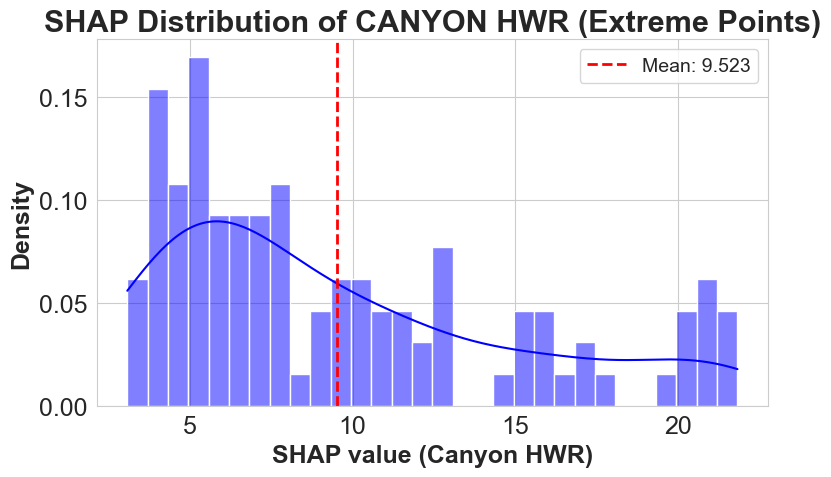

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load SHAP values (shape = (n_samples, n_features))
shap_values = np.load('ERP_automl_model_RH2Mmean_shap.npy')  # adjust path if needed

# Index of canyon HWR feature in SHAP array
canyonhwr_index = 9

# Extract SHAP values for that feature and reshape to grid (50, 112)
canyonhwr_shap = shap_values[:, canyonhwr_index].reshape(50, 112)

# Select SHAP values at extreme grid points using your boolean mask
shap_extreme_canyonhwr = canyonhwr_shap[extreme_mask]

# Compute mean SHAP for extreme points
mean_shap = np.nanmean(shap_extreme_canyonhwr)

# Plot histogram + KDE
plt.figure(figsize=(8, 5))
sns.histplot(shap_extreme_canyonhwr, kde=True, color='b', stat='density', bins=30)

# Add vertical mean line
plt.axvline(mean_shap, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_shap:.3f}')

plt.title('SHAP Distribution of CANYON HWR (Extreme Points)', fontsize=22, fontweight='bold')
plt.xlabel('SHAP value (Canyon HWR)', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=18, width=2)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('shap_extreme_canyonhwr_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

提取到的极端点数量: 104
x range: 0.0005 - 0.0765
y range: 3.0877 - 21.8136
color range: 60.0006 - 84.3284
幂律拟合结果：
  a = 1.15183
  b = -0.492258
  log-space R^2 = 0.902160
0.0005146359459725873


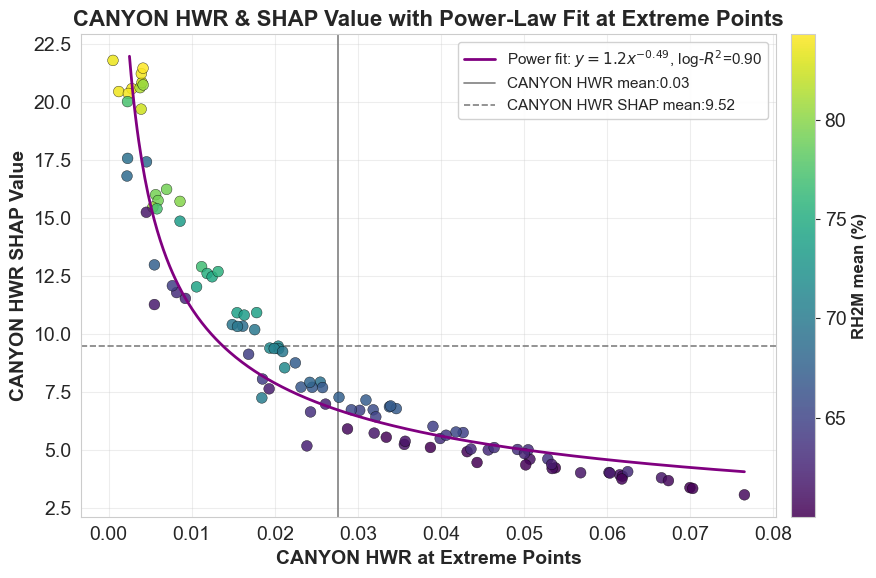

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.metrics import r2_score
import seaborn as sns

def extract_selected_flat(canyon, shap, target, mask):
    """
    Apply `mask` to `canyon`, `shap`, `target` and return flattened arrays x, y, c.
    Supports:
      - mask same shape as canyon (element-wise boolean)
      - mask as column mask (ncols,) -> canyon[:, mask].flatten()
      - mask as row mask (nrows,)    -> canyon[mask, :].flatten()
    """
    canyon = np.asarray(canyon)
    shap = np.asarray(shap)
    target = np.asarray(target)
    mask = np.asarray(mask)

    if canyon.shape != shap.shape or canyon.shape != target.shape:
        raise ValueError("canyon, shap, target must have the same shape")

    # element-wise mask
    if mask.shape == canyon.shape:
        x = canyon[mask].flatten()
        y = shap[mask].flatten()
        c = target[mask].flatten()
        return x, y, c

    # column mask
    if mask.ndim == 1 and mask.shape[0] == canyon.shape[1]:
        x = canyon[:, mask].flatten()
        y = shap[:, mask].flatten()
        c = target[:, mask].flatten()
        return x, y, c

    # row mask
    if mask.ndim == 1 and mask.shape[0] == canyon.shape[0]:
        x = canyon[mask, :].flatten()
        y = shap[mask, :].flatten()
        c = target[mask, :].flatten()
        return x, y, c

    raise ValueError("Unrecognized mask shape. Ensure mask is a boolean array matching dimension.")

# --- Extract and clean ---
x_all, y_all, color_all = extract_selected_flat(canyonhwr_Man, canyonhwr_shap, target_y, extreme_mask)

# Filter NaN / Inf
valid = np.isfinite(x_all) & np.isfinite(y_all) & np.isfinite(color_all)
x_all = x_all[valid]
y_all = y_all[valid]
color_all = color_all[valid]

if len(x_all) == 0:
    raise RuntimeError("No valid extreme points found (x_all length is 0). Check extreme_mask and data.")

print(f"Number of extreme points: {len(x_all)}")
print(f"x range: {np.min(x_all):.4f} - {np.max(x_all):.4f}")
print(f"y range: {np.min(y_all):.4f} - {np.max(y_all):.4f}")
print(f"color range: {np.min(color_all):.4f} - {np.max(color_all):.4f}")

# --- Keep positive values for log-log fit ---
mask_pos = (x_all > 0) & (y_all > 0)
x_pos = x_all[mask_pos]
y_pos = y_all[mask_pos]
color_pos = color_all[mask_pos]

if len(x_pos) < 3:
    raise RuntimeError("Fewer than 3 positive points for power-law fit; cannot fit reliably.")

# --- Log-log linear fit: log(y) = b * log(x) + log(a) ---
logx = np.log(x_pos)
logy = np.log(y_pos)

b, loga = np.polyfit(logx, logy, 1)
a = np.exp(loga)

# log-space R^2
y_log_pred = b * logx + loga
r2_log = 1 - np.sum((logy - y_log_pred) ** 2) / np.sum((logy - np.mean(logy)) ** 2)
# alternative: r2_score(logy, y_log_pred)

print("Power-law fit results:")
print(f"  a = {a:.6g}")
print(f"  b = {b:.6g}")
print(f"  log-space R^2 = {r2_log:.6f}")

# --- Plot ---
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(9, 6))

# Scatter colored by target (color_all)
norm = Normalize(vmin=np.min(color_all), vmax=np.max(color_all))
sc = ax.scatter(x_all, y_all, c=color_all, cmap='viridis', norm=norm,
                alpha=0.85, edgecolors='k', linewidths=0.3, s=60, zorder=3)

cbar = fig.colorbar(sc, ax=ax, fraction=0.045, pad=0.02)
cbar.set_label('RH2M mean (%)', fontweight='bold', fontsize=12)

# Fit curve in original space
x_fit = np.linspace(np.min(x_pos)*0.8, np.max(x_pos)*1.05, 400)
y_fit = a * (x_fit ** b)
ax.plot(x_fit, y_fit, color='purple', lw=2.0, linestyle='-', zorder=5,
        label=fr'Power fit: $y={a:.2g}x^{{{b:.2g}}}$, log-$R^2$={r2_log:.2f}')

# Mean lines
mean_x = np.mean(x_all)
mean_y = np.mean(y_all)
ax.axvline(mean_x, color='gray', linestyle='-', lw=1.2, label=f'CANYON HWR mean: {mean_x:.2f}')
ax.axhline(mean_y, color='gray', linestyle='--', lw=1.2, label=f'CANYON HWR SHAP mean: {mean_y:.2f}')

ax.set_xlabel('CANYON HWR at Extreme Points', fontweight='bold', fontsize=14)
ax.set_ylabel('CANYON HWR SHAP Value', fontweight='bold', fontsize=14)
ax.set_title('CANYON HWR & SHAP Value with Power-Law Fit at Extreme Points', fontweight='bold', fontsize=16)
ax.grid(True, alpha=0.35)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, fontsize=11, loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.savefig('powerlaw_fit_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# ============= Modify albedo (canyon HWR) =============
change = 0.04  # a reasonable increment
# Increase canyon HWR at extreme mask locations
canyonhwr_Man[extreme_mask] = canyonhwr_Man[extreme_mask] + change

# Ensure albroof_Man stays within physical bounds
albroof_Man = np.clip(albroof_Man, 0, 5)

# Update features (assuming feature index 9 corresponds to canyon HWR)
features[9, :, :] = canyonhwr_Man

# Reshape for model input (each grid cell a sample)
X_klaml_change = features.reshape(num_features, -1).T
print(X_klaml_change.shape)

# Predict with the updated inputs
y_pred_klaml_4_change = automl4.predict(X_klaml_change)
y_pred_grid_klaml_4_change = y_pred_klaml_4_change.reshape(height, width)

# Reapply NaN mask where input had all-NaN features
y_pred_grid_klaml_4_change[nan_mask] = np.nan

# Mask predictions to the Manchester polygon
y_pred_grid_klaml_filtered_4_change = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_4_change, manchester_polygon
)

# Optionally: to cap unrealistic high values, you could uncomment and adjust:
# mask_high = y_pred_grid_klaml_filtered_4_change > 40
# y_pred_grid_klaml_filtered_4_change[mask_high] = np.random.uniform(35, 38, size=np.sum(mask_high))

(5600, 12)


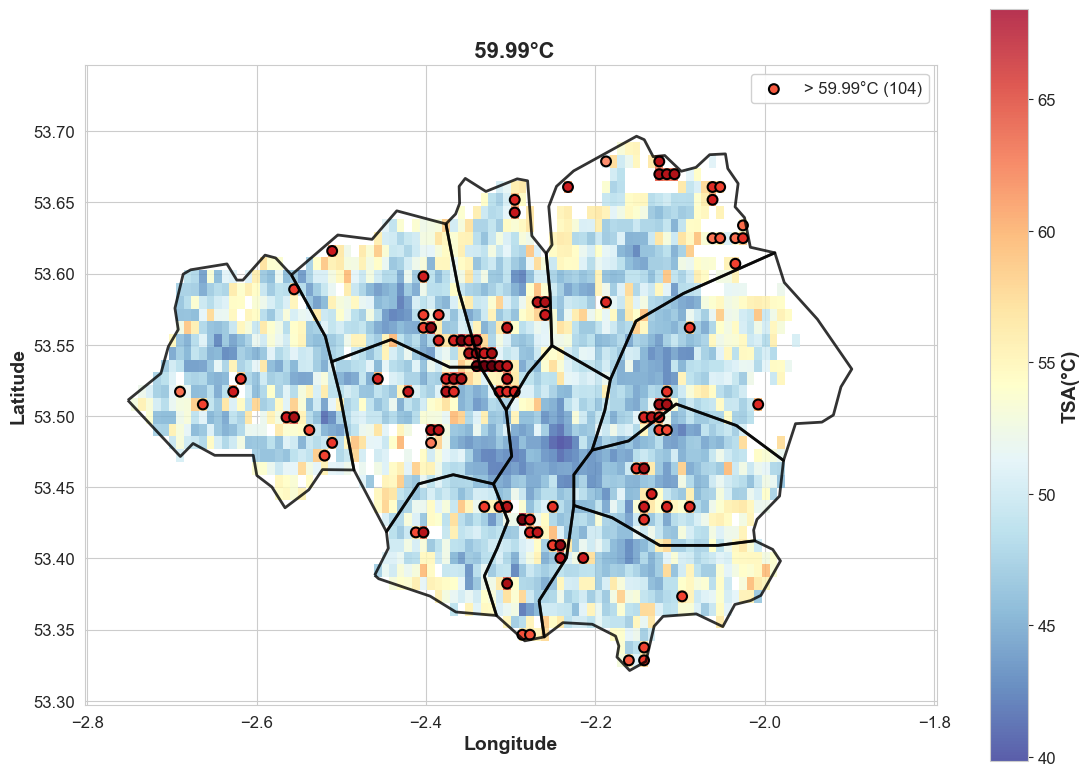

In [ ]:
# Get extreme-point coordinates and values
target_change = y_pred_grid_klaml_filtered_4_change
extreme_lons = lon_grid[extreme_mask]
extreme_lats = lat_grid[extreme_mask]
extreme_values = target_change[extreme_mask]

# Plot
plt.figure(figsize=(12, 10))

# Determine global color range for the map and scatter
vmin = np.nanmin(target_change)
vmax = np.nanmax(target_change)

# Heatmap of the predicted grid
mesh = plt.pcolormesh(
    lon_grid, lat_grid, target_change,
    shading='auto', cmap='RdYlBu_r', alpha=0.8,
    vmin=vmin, vmax=vmax
)

# Scatter the extreme points, using the same vmin/vmax so colors match the heatmap
scatter = plt.scatter(
    extreme_lons, extreme_lats,
    c=extreme_values, cmap='Reds',
    marker='o', s=50, edgecolor='black', linewidth=1.5,
    vmin=vmin, vmax=vmax,
    label=f'> {threshold}°C ({extreme_count})'
)

# Unified colorbar (based on the pcolormesh)
cbar = plt.colorbar(mesh, label='TSA', shrink=0.8)
cbar.set_label('TSA(°C)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)

# Legend for the scatter/threshold
plt.legend(fontsize=12, loc='upper right', framealpha=0.9)

# Plot polygon boundaries on top
gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=2, alpha=0.8)

# Labels and title
plt.xlabel('Longitude', fontsize=14, fontweight='bold')
plt.ylabel('Latitude', fontsize=14, fontweight='bold')
plt.title(f'{threshold:.2f}°C', fontsize=16, fontweight='bold')

# Tick formatting
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21868\2308185284.py:54: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(extreme_lons_new, extreme_lats_new,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21868\2308185284.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax2.scatter(extreme_lons_new, extreme_lats_new,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21868\2308185284.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # 为colorbar留出空间


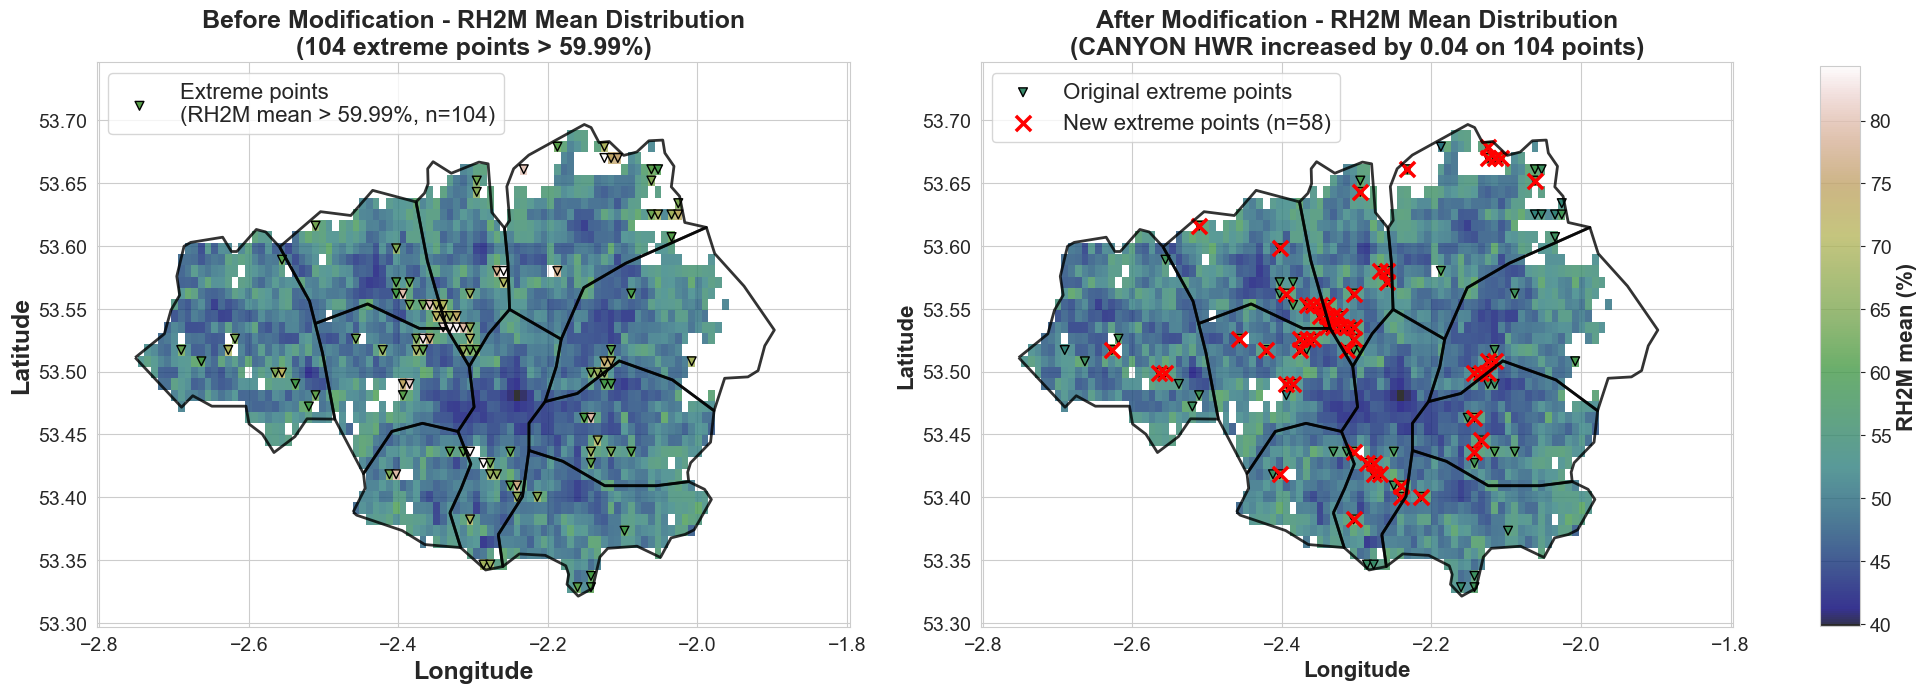

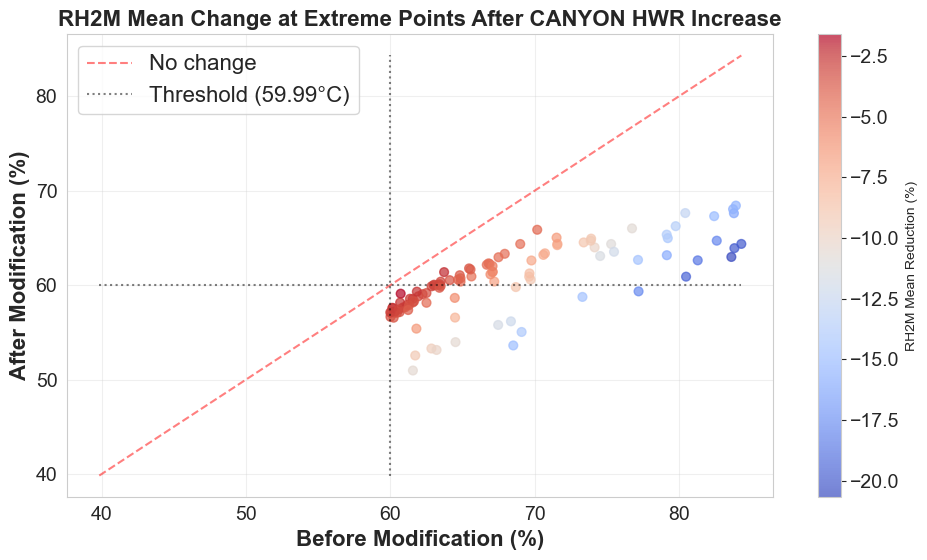

=== 改造效果统计 ===
原始极端点数: 104
改造后极端点数: 58
极端点减少: 46
原始极端点平均降温: -7.56%
最大降温: -1.62%
最小降温: -20.65%
降温点数: 0
无变化点数: 0
升温点数: 104 (可能异常)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Unified color range across both maps ---
vmin = min(np.nanmin(target_y), np.nanmin(target_change))
vmax = max(np.nanmax(target_y), np.nanmax(target_change))
color_t = 'gist_earth'

# Create comparison figure (before vs after)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# ============= Left: Before modification ============
mesh1 = ax1.pcolormesh(
    lon_grid, lat_grid, target_y,
    shading='auto', cmap=color_t, alpha=0.8,
    vmin=vmin, vmax=vmax
)

# Mark original extreme points
scatter1 = ax1.scatter(
    extreme_lons, extreme_lats,
    c=target_y[extreme_mask], cmap=color_t,
    marker='v', s=40, edgecolor='black', linewidth=1,
    vmin=vmin, vmax=vmax,
    label=f'Extreme points\n(RH2M mean > {threshold}%, n={extreme_count})'
)

# Add boundaries
gdf_combined.boundary.plot(ax=ax1, edgecolor='black', linewidth=2, alpha=0.8)

ax1.set_xlabel('Longitude', fontsize=18, fontweight='bold')
ax1.set_ylabel('Latitude', fontsize=18, fontweight='bold')
ax1.set_title(
    f'Before Modification - RH2M Mean Distribution\n({extreme_count} extreme points > {threshold}%)',
    fontsize=18, fontweight='bold'
)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.legend(fontsize=16, loc='upper left')

# ============= Right: After modification ============
mesh2 = ax2.pcolormesh(
    lon_grid, lat_grid, target_change,
    shading='auto', cmap=color_t, alpha=0.8,
    vmin=vmin, vmax=vmax
)

# Mark original extreme points on the after-map (colored by new values)
scatter2 = ax2.scatter(
    extreme_lons, extreme_lats,
    c=target_change[extreme_mask], cmap=color_t,
    marker='v', s=40, edgecolor='black', linewidth=1,
    vmin=vmin, vmax=vmax,
    label='Original extreme points'
)

# Add polygon boundaries
gdf_combined.boundary.plot(ax=ax2, edgecolor='black', linewidth=2, alpha=0.8)

# Identify any new extreme points after modification
extreme_mask_new = target_change > threshold
extreme_count_new = int(np.nansum(extreme_mask_new))
extreme_lons_new = lon_grid[extreme_mask_new]
extreme_lats_new = lat_grid[extreme_mask_new]

if extreme_count_new > 0:
    ax2.scatter(
        extreme_lons_new, extreme_lats_new,
        color='red', marker='x', s=120, edgecolor='black', linewidth=2.5,
        vmin=vmin, vmax=vmax,
        label=f'New extreme points (n={extreme_count_new})'
    )

ax2.set_xlabel('Longitude', fontsize=16, fontweight='bold')
ax2.set_ylabel('Latitude', fontsize=16, fontweight='bold')
ax2.set_title(
    f'After Modification - RH2M Mean Distribution\n(CANYON HWR increased by {change} on {extreme_count} points)',
    fontsize=18, fontweight='bold'
)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.legend(fontsize=16, loc='upper left')

# ============= Shared colorbar ============
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(mesh1, cax=cbar_ax)
cbar.set_label('RH2M mean (%)', fontsize=16, fontweight='bold')
cbar.ax.tick_params(labelsize=14)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave space for the colorbar
plt.savefig('ERP_casestudy2_3.png', dpi=300, bbox_inches='tight')
plt.show()

# ============= Scatter: Before vs After for original extreme points ============
plt.figure(figsize=(10, 6))

# Compute changes at original extreme points
temperature_changes = target_change[extreme_mask] - target_y[extreme_mask]

sc = plt.scatter(
    target_y[extreme_mask],
    target_change[extreme_mask],
    c=temperature_changes, cmap='coolwarm', s=40, alpha=0.7
)

# Reference lines and threshold markers
plt.plot([vmin, vmax], [vmin, vmax], 'r--', alpha=0.5, label='No change')
plt.plot([threshold, threshold], [vmin, vmax], 'k:', alpha=0.5, label=f'Threshold ({threshold}°C)')
plt.plot([vmin, vmax], [threshold, threshold], 'k:', alpha=0.5)

plt.xlabel('Before Modification (%)', fontsize=16, fontweight='bold')
plt.ylabel('After Modification (%)', fontsize=16, fontweight='bold')
plt.title('RH2M Mean Change at Extreme Points After CANYON HWR Increase', fontsize=16, fontweight='bold')

cbar2 = plt.colorbar(sc)
cbar2.set_label('RH2M Mean Reduction (%)', fontsize=12)

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('ERP_casestudy2_4.png', dpi=300, bbox_inches='tight')
plt.show()

# ============= Print summary statistics ============
print("=== Modification Effect Summary ===")
print(f"Original extreme count: {extreme_count}")
print(f"After-modification extreme count: {extreme_count_new}")
print(f"Reduction in extreme points: {extreme_count - extreme_count_new}")

# Compute statistics of changes for the original extreme points
valid_changes = temperature_changes[~np.isnan(temperature_changes)]
if len(valid_changes) > 0:
    mean_change = np.mean(valid_changes)
    max_change = np.max(valid_changes)
    min_change = np.min(valid_changes)

    print(f"Mean reduction at original extremes: {mean_change:.2f}%")
    print(f"Max reduction: {max_change:.2f}%")
    print(f"Min reduction: {min_change:.2f}%")

    positive_cooling = np.sum(valid_changes > 0)
    no_change = np.sum(valid_changes == 0)
    negative_cooling = np.sum(valid_changes < 0)

    print(f"Number of cooling points: {positive_cooling}")
    print(f"Number of unchanged points: {no_change}")
    print(f"Number of warming points: {negative_cooling} (investigate)")
else:
    print("No valid change values to summarize.")

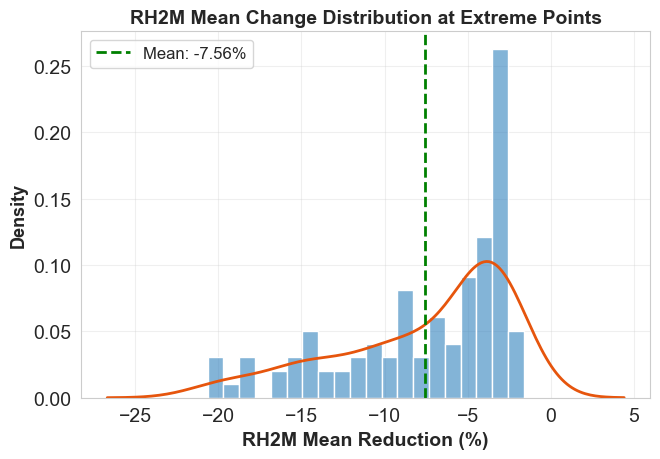

In [ ]:
# Keep only non-NaN changes
valid_changes = temperature_changes[~np.isnan(temperature_changes)]

plt.figure(figsize=(7, 5))

# Histogram (density)
sns.histplot(valid_changes, bins=20, kde=False, stat="density",
             color="#3182bd", edgecolor='w', alpha=0.6)

# Overlay KDE
sns.kdeplot(valid_changes, color="#e6550d", linewidth=2)

# Mean vertical line
mean_change = np.mean(valid_changes)
plt.axvline(mean_change, color="green", linestyle="--", lw=2,
            label=f'Mean: {mean_change:.2f}%')

plt.xlabel("RH2M Mean Reduction (%)", fontsize=14, fontweight='bold')
plt.ylabel("Density", fontsize=13, fontweight='bold')
plt.title("RH2M Mean Change Distribution at Extreme Points", fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig('ERP_casestudy2_5.png', dpi=300, bbox_inches='tight')
plt.show()